# Сборный проект - 1

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Цель проекта: 
Необходимо выявить определяющие успешность игры закономерности, для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Шаг 1. Открыла файл с данными, изучила общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/.../....csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Шаг 2. Подготовка данных

In [3]:
#Заменила названия столбцов (привела к нижнему регистру)

data.columns = data.columns.str.lower()

In [4]:
#Проверим, изменились ли названия

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим, есть ли пропуски.

In [5]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Видно, что в следующих столбцах есть пустые значения:name, year_of_release, genre, critic_score, user_score, rating.

Удалим строки с пустыми значениями для столбцов year_of_release, name, genre (вместе они составляют менее 2% от выборки).

В столбцах critic_score, user_score строки с пустыми значениями трогать не будем, т.к. нет понимания, как рассчитывается этот ретинг и как правильно заменить пустые строки.

В столбце rating вместо пустых значений поставим unknown.

In [6]:
#удалим 269 строк с пустым значением в year_of_release

data = data.dropna(subset=['year_of_release'])

#удалим 2 строки с пустым значением в name (пропуски в genre также удалятся)

data = data.dropna(subset=['name'])
data = data.reset_index(drop=True)

#Заменим пустые ячейки в столбце rating на unknown

data['rating'] = data['rating'].fillna('unknown')

In [7]:
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64


In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score есть значение "tbd" - скорее всего, это означает, что пользователь не внес данные,
что равносильно не заполненным ячейкам. Поэтому заменим "tbd" на nan, для того, чтобы небыло путаницы в дальнейшем. 

In [9]:
data['user_score'] = data['user_score'].replace('tbd', )

Для того, чтобы поменять тип данных в столбце user_score с object на float, заменим пропуски на 1000000, а потом вернем пропуски обратно.

In [10]:
data['user_score'] = data['user_score'].fillna(1000000)

Преобразуем типы данных там, где это необходимо.

In [11]:
#Преобразуем year_of_release в datetime

data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
#data['year_of_release'] = data['year_of_release'].astype('int')

#Преобразуем user_score в float

data['user_score'] = data['user_score'].astype('float')

In [12]:
#Убедимся, что типы данных поменялись

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       16444 non-null  float64       
 10  rating           16444 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [13]:
data['user_score'] = data['user_score'].replace(1000000, )

Посчитаем суммарные продажи по регионам и добавим новый столбец sales_total.

In [14]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales'] = data['total_sales'].astype('float')

Шаг 3. Проведем исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

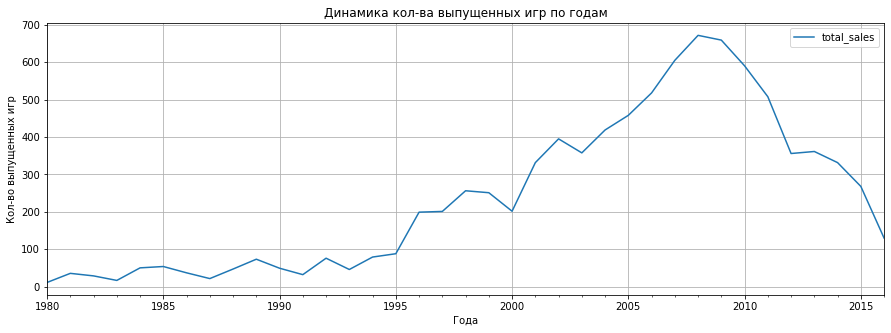

In [15]:
import matplotlib.pyplot as plt

ax = data.pivot_table(index='year_of_release', values='total_sales', aggfunc = 'sum')\
    .plot(grid=True, figsize=(15, 5))\
    .set(title = 'Динамика кол-ва выпущенных игр по годам', xlabel = 'Года', ylabel = 'Кол-во выпущенных игр')


Количество выпущенных игр очень различается в зависимости от года. Максимум был в 2008 и 2009 годах - потом начался спад.
На мой взгляд, необходимо выбрать период с которым мы будем работать. Он должен быть близок к текущему и прогнозируемому, т.к. если взять например 1987 год - в нем были популярны совсем другие игры и продажи были гораздо ниже.

Посмотрим, как менялись продажи по платформам.

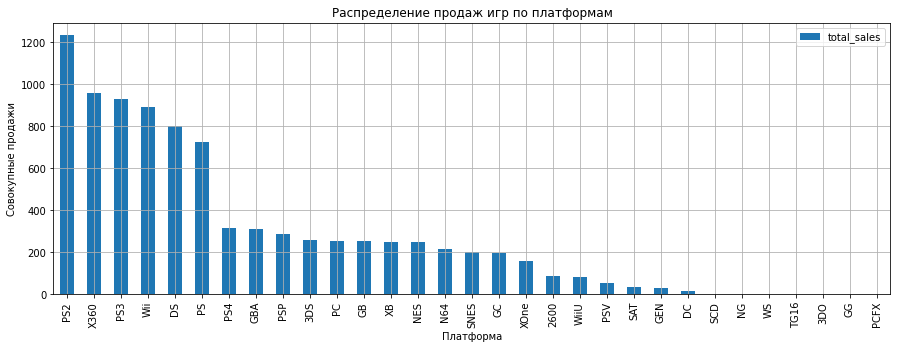

In [57]:
ax = data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum').reset_index()\
    .sort_values(by='total_sales', ascending=False)\
    .plot(x='platform', y='total_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр по платформам', xlabel = 'Платформа', ylabel = 'Совокупные продажи')

Для того, чтобы оценить жизненный цикл платформ, построим распределение по годам.
Рассмотрим пример 4х поколений Play station - PS, PS2, PS3, PS4.

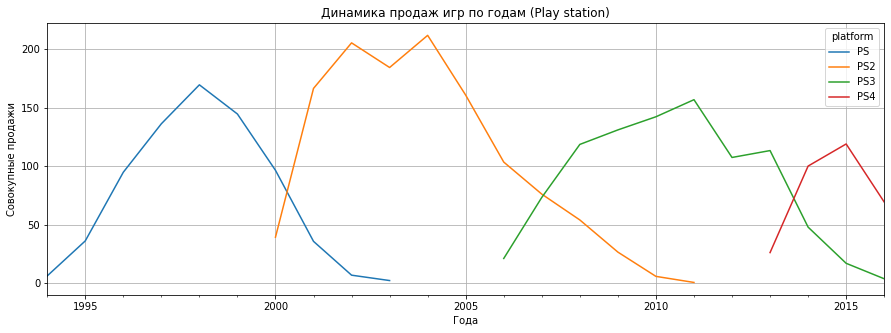

In [56]:
ax = data.query('platform ==["PS2", "PS3", "PS", "PS4"]')\
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc = 'sum')\
    .plot(grid=True, figsize=(15, 5))\
    .set(title = 'Динамика продаж игр по годам (Play station)', xlabel = 'Года', ylabel = 'Совокупные продажи')


Видно, что жизненный цикл составляет 10 лет (срок от появления, до исчезновения).

Аналогичный результат получим, если возьмем топ5 по уровню продаж.

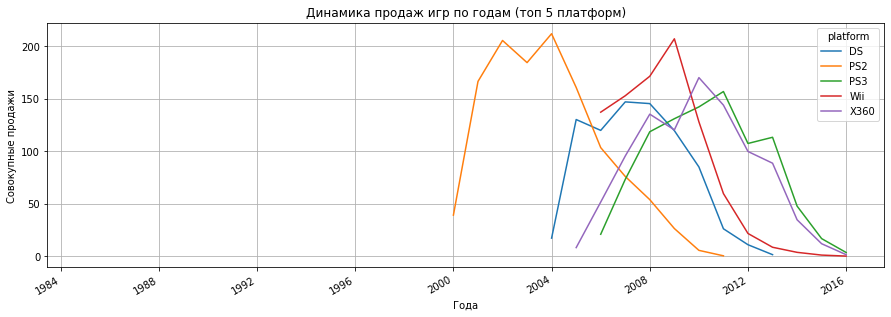

In [18]:
ax = data.query('platform ==["PS2", "PS3", "X360", "Wii", "DS"]')\
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc = 'sum')\
    .plot(grid=True, figsize=(15, 5))\
    .set(title = 'Динамика продаж игр по годам (топ 5 платформ)', xlabel = 'Года', ylabel = 'Совокупные продажи')

Видно, что их жизненный цикл составляет около 10 лет.

Выберем актуальный период, на котором будем проводить аналитику.
Если посмотреть на динамику кол-ва выпущенных игр по годам видно, что начиная с 2008 года началось падение кол-ва выходящих видеоигр. Начиная с 2012 года видна стабилизация.
Поэтому за актуальный период возьмем 2012 - 2015 год (2016 год учитывать не будем, т.к. скорее всего продажи по нему еще не полные).

Выясним, какие платформы лидируют по продажам, растут или падают для актуального перида.

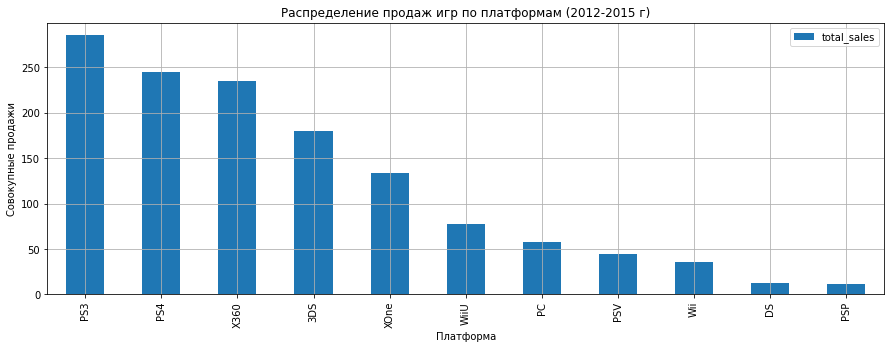

In [54]:
#Сделаем распределение продаж по платформам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
     .pivot_table(index='platform', values='total_sales', aggfunc = 'sum').reset_index()\
     .sort_values(by='total_sales', ascending=False)\
     .plot(x='platform', y='total_sales', grid=True, figsize=(15, 5), kind='bar')\
     .set(title = 'Распределение продаж игр по платформам (2012-2015 г)', xlabel = 'Платформа', ylabel = 'Совокупные продажи')

Видно, что за этот период есть продажи по 11 платформам. Возьмем 5 лидеров и проанализируем динамику их продаж, затем посмотрим на оставшиеся 6 платформ.

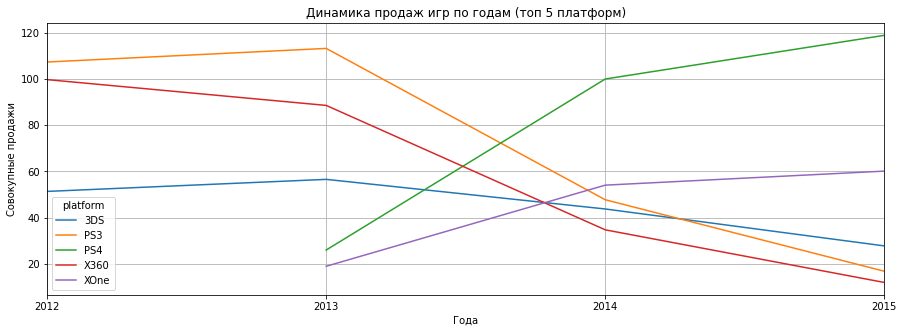

In [20]:
#Топ 5 по продажам за период

ax = data.query('platform ==["PS4", "PS3", "X360", "XOne", "3DS"] and ("2012"<= year_of_release <="2015")')\
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc = 'sum')\
    .plot(grid=True, figsize=(15, 5))\
    .set(title = 'Динамика продаж игр по годам (топ 5 платформ)', xlabel = 'Года', ylabel = 'Совокупные продажи')

Судя по графику и опираясь на то, что жизненный цикл платформы составляет около 10 лет, то потенциально прибыльными можно считать платформы PS4 и xOne. Они будут продаваться еще около 7 лет. Остальные платформы из топ 5 за период демонстрируют спад продаж.

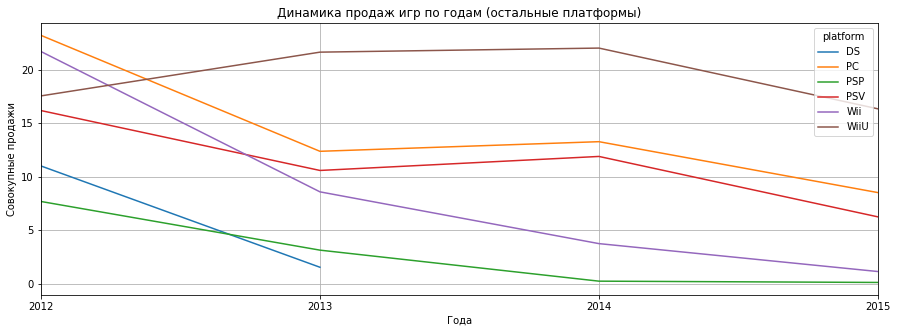

In [21]:
# Рассмотрим остальные платформы

ax = data.query('platform !=["PS4", "PS3", "X360", "XOne", "3DS"] and ("2012"<= year_of_release <="2015")')\
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc = 'sum')\
    .plot(grid=True, figsize=(15, 5))\
    .set(title = 'Динамика продаж игр по годам (остальные платформы)', xlabel = 'Года', ylabel = 'Совокупные продажи')

Если рассматривать не топовые платформы, можно братить внимание на платформу WiiU - она вышла в 2012 году и имеет стабильную динамику продаж, которая может сохраняться еще несколько лет. Поэтому ее я также отнесла бы к потенциально прибыльной в своем сегменте.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам.

(0.0, 7.0)

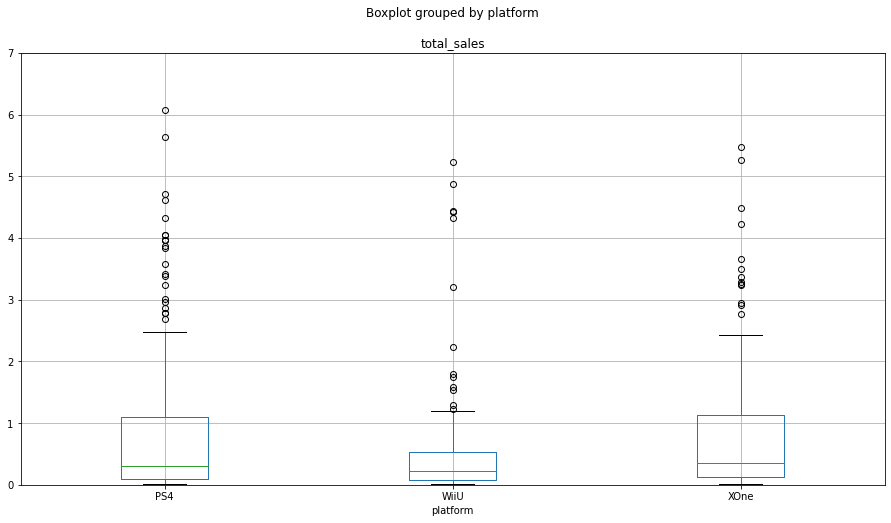

In [22]:
ax = data.query('platform ==["PS4", "XOne", "WiiU"] and ("2012"<= year_of_release <="2015")')\
     .boxplot(column = 'total_sales', by = 'platform', figsize=(15, 8))

plt.ylim(0,7)

Рассмотрим ящики с усами:
 - Для всех платформ минимальное значение это 0, т.к. продажи не могут быть отрицательными.
 - Верхний заканчивается около 2,5 у PS4 и XOne и около 1,2 у WiiU  — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней будем считать выбросами.
 - Медиана у PS4 и XOne - около 0,3, а у WiiU - около 0,2.
 - Т.к. зеленая линия стремится вниз, а не в сторону верхнего уса, можно сделать вывод, что выбросы - это достаточно редкое явление для всех платформ.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Text(0, 0.5, 'Отзывы пользователей')

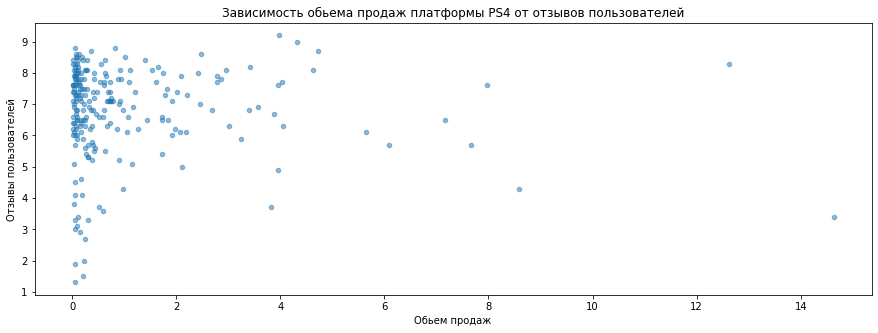

In [23]:
#Зависимость продаж платформы PS4 от отзывов пользователей

(
    data.query('platform =="PS4" and ("2012"<= year_of_release <="2015")')
    .sort_values('user_score')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, figsize=(15,5))
) 
plt.title('Зависимость обьема продаж платформы PS4 от отзывов пользователей')
plt.xlabel('Обьем продаж')
plt.ylabel('Отзывы пользователей')

In [24]:
#Рассчитаем корреляцию между обьемом продаж и отзывами пользователей

data_1 = data.query('platform =="PS4" and ("2012"<= year_of_release <="2015")')
data_1['total_sales'].corr(data_1['user_score'])

-0.028820146478203145

Как на графике, так и при рассчете корреляции видно, что зависимости нет.

Text(0, 0.5, 'Отзывы критиков')

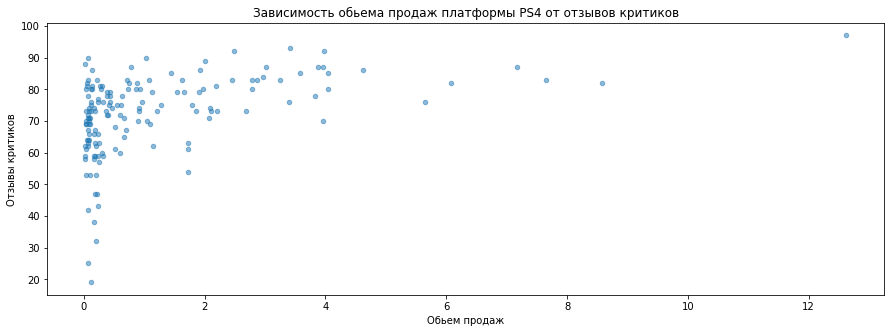

In [25]:
#Зависимость продаж платформы PS4 от отзывов критиков

(
    data.query('platform =="PS4" and ("2012"<= year_of_release <="2015")')
    .sort_values('critic_score')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.5, figsize=(15,5))
) 
plt.title('Зависимость обьема продаж платформы PS4 от отзывов критиков')
plt.xlabel('Обьем продаж')
plt.ylabel('Отзывы критиков')

In [26]:
#Рассчитаем корреляцию между обьемом продаж и отзывами критиков

data_1 = data.query('platform =="PS4" and ("2012"<= year_of_release <="2015")')
data_1['total_sales'].corr(data_1['critic_score'])

0.4318482049982005

Как на графике, так и при рассчете корреляции видно, что зависимость есть, но не высокая.

Text(0, 0.5, 'Отзывы пользователей')

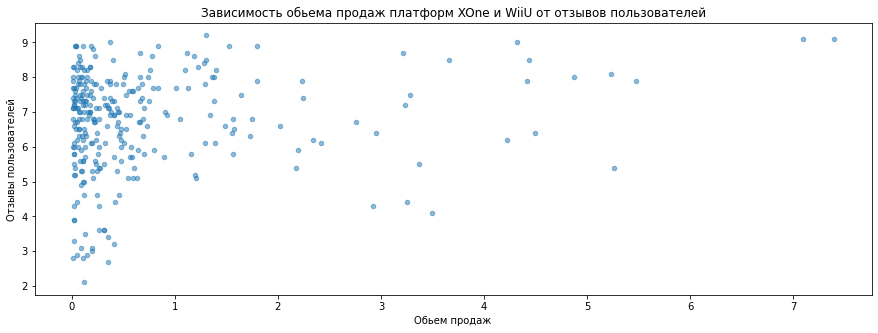

In [27]:
#Зависимость продаж других потенциально прибыльных платформ от отзывов пользователей

(
    data.query('platform == ["XOne", "WiiU"] and ("2012"<= year_of_release <="2015")')
    .sort_values('user_score')
    .plot(x='total_sales', y='user_score', kind='scatter', alpha=0.5, figsize=(15,5), by='platform')
) 
plt.title('Зависимость обьема продаж платформ XOne и WiiU от отзывов пользователей')
plt.xlabel('Обьем продаж')
plt.ylabel('Отзывы пользователей')

In [28]:
#Рассчитаем корреляцию между обьемом продаж и отзывами пользователей

data_1 = data.query('platform ==["XOne", "WiiU"] and ("2012"<= year_of_release <="2015")')
data_1['total_sales'].corr(data_1['user_score'])

0.16141618154008666

Видно, что корреляция отсутствует.

Text(0, 0.5, 'Отзывы критиков')

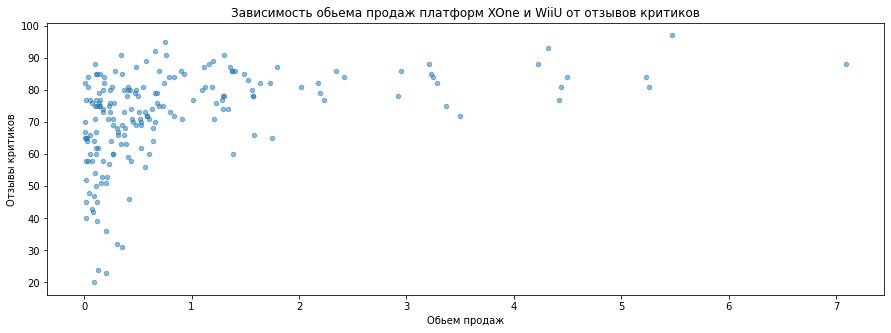

In [29]:
#Зависимость продаж других потенциально прибыльных платформ от отзывов критиков

(
    data.query('platform ==["XOne", "WiiU"] and ("2012"<= year_of_release <="2015")')
    .sort_values('critic_score')
    .plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.5, figsize=(15,5))
) 
plt.title('Зависимость обьема продаж платформ XOne и WiiU от отзывов критиков')
plt.xlabel('Обьем продаж')
plt.ylabel('Отзывы критиков')

In [30]:
#Рассчитаем корреляцию между обьемом продаж и отзывами критиков

data_1 = data.query('platform ==["XOne", "WiiU"] and ("2012"<= year_of_release <="2015")')
data_1['total_sales'].corr(data_1['critic_score'])

0.41397224738362337

Как на графике, так и при рассчете корреляции видно, что зависимость есть, но не высокая.

Можно сделать вывод, что как для выбранной платформы PS4, так и для других прибыльных платформ обьем продаж поожительно зависит от оценок критиков и не зависит от оценок пользователей.

Рассмотрим общее распределение игр по жанрам.

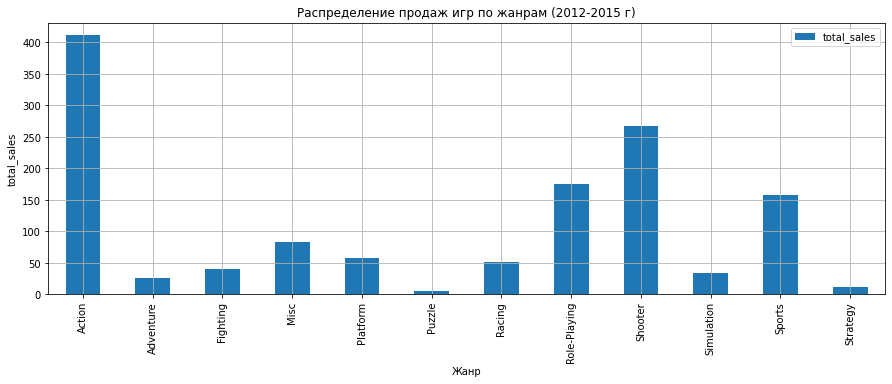

In [31]:
#Сделаем распределение продаж по жанрам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='genre', values='total_sales', aggfunc = 'sum').reset_index()\
    .plot(x='genre', y='total_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр по жанрам (2012-2015 г)', xlabel = 'Жанр', ylabel = 'total_sales')

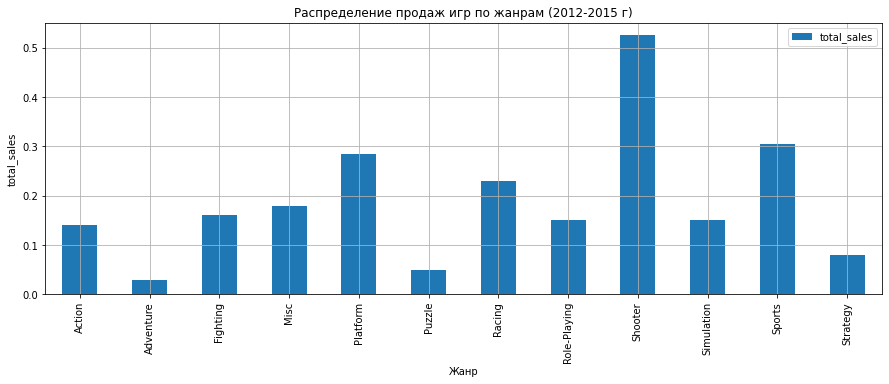

In [59]:
#Сделаем распределение медиан продаж по жанрам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='genre', values='total_sales', aggfunc = 'median').reset_index()\
    .plot(x='genre', y='total_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр по жанрам (2012-2015 г)', xlabel = 'Жанр', ylabel = 'total_sales')

Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).

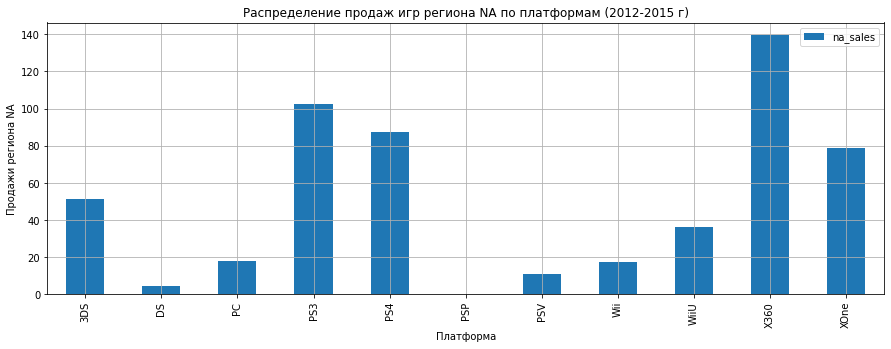

In [32]:
#Сделаем распределение продаж региона NA по платформам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='na_sales', aggfunc = 'sum').reset_index()\
    .plot(x='platform', y='na_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона NA по платформам (2012-2015 г)', xlabel = 'Платформа', ylabel = 'Продажи региона NA')

In [33]:
#Посчитаем доли рынка для каждой из платформ

data_na = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='na_sales', aggfunc = 'sum').reset_index()

data_na['market_share_na'] = data_na['na_sales']/data_na['na_sales'].sum()
data_na.columns = ['Платформа', 'Продажи региона NA', 'Доля рынка,%']
data_na = data_na.style.format({'Доля рынка,%': '{:,.1%}'.format,})
data_na
    

,Платформа,Продажи региона NA,"Доля рынка,%"
0,3DS,51.170000,9.4%
1,DS,4.590000,0.8%
2,PC,17.760000,3.3%
3,PS3,102.710000,18.8%
4,PS4,87.250000,16.0%
5,PSP,0.130000,0.0%
6,PSV,10.830000,2.0%
7,Wii,17.390000,3.2%
8,WiiU,36.000000,6.6%
9,X360,139.360000,25.5%


Топ5 самых популярных платформ для региона NA:

X360 - 25,5%
PS3 - 18,8%
PS4 - 16%
XOne - 14,4%
3DS - 9,4%

Т.к. в качестве перспективных для инвестиций мы веделили только PS4 и XOne из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона NA можно и PS4 и XOne т.к. долю рынка они занимают примерно одинаковую.

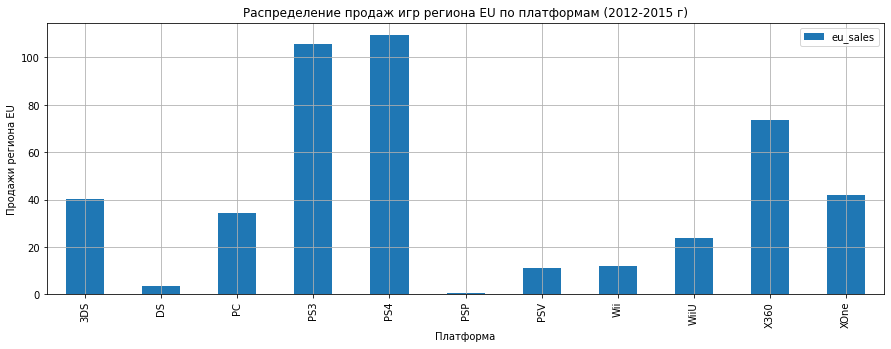

In [34]:
#Сделаем распределение продаж региона EU по платформам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').reset_index()\
    .plot(x='platform', y='eu_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона EU по платформам (2012-2015 г)', xlabel = 'Платформа', ylabel = 'Продажи региона EU')

In [35]:
#Посчитаем доли рынка для каждой из платформ

data_eu = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').reset_index()

data_eu['market_share_eu'] = data_eu['eu_sales']/data_eu['eu_sales'].sum()
data_eu.columns = ['Платформа', 'Продажи региона EU', 'Доля рынка,%']
data_eu = data_eu.style.format({'Доля рынка,%': '{:,.1%}'.format,})
data_eu
    

,Платформа,Продажи региона EU,"Доля рынка,%"
0,3DS,40.310000,8.8%
1,DS,3.530000,0.8%
2,PC,34.230000,7.5%
3,PS3,105.600000,23.2%
4,PS4,109.310000,24.0%
5,PSP,0.420000,0.1%
6,PSV,10.970000,2.4%
7,Wii,11.810000,2.6%
8,WiiU,23.650000,5.2%
9,X360,73.810000,16.2%


Топ5 самых популярных платформ для региона EU:

PS4 - 24%
PS3 - 23,2%
X360 - 16,2%
XOne - 9,2%
3DS - 8,8%

Т.к. в качестве перспективных для инвестиций мы веделили только PS4 и XOne из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона EU будем PS4, т.к. доля рынка у нее выше, чем у XOne.

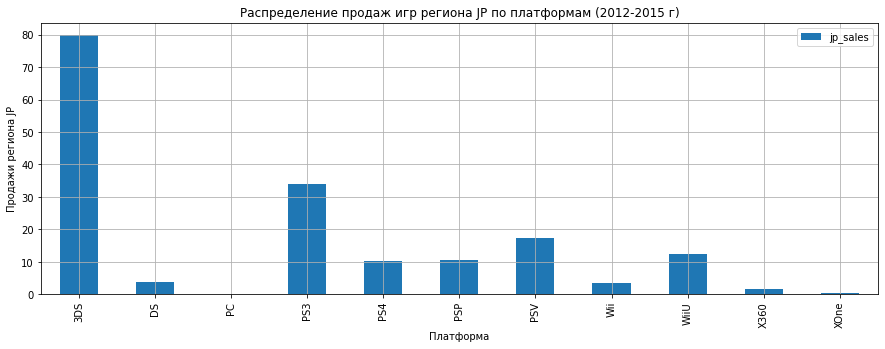

In [36]:
#Сделаем распределение продаж региона JP по платформам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').reset_index()\
    .plot(x='platform', y='jp_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона JP по платформам (2012-2015 г)', xlabel = 'Платформа', ylabel = 'Продажи региона JP')

In [37]:
#Посчитаем доли рынка для каждой из платформ

data_jp = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').reset_index()

data_jp['market_share_jp'] = data_jp['jp_sales']/data_jp['jp_sales'].sum()
data_jp.columns = ['Платформа', 'Продажи региона JP', 'Доля рынка,%']
data_jp = data_jp.style.format({'Доля рынка,%': '{:,.1%}'.format,})
data_jp

,Платформа,Продажи региона JP,"Доля рынка,%"
0,3DS,79.760000,46.0%
1,DS,3.720000,2.1%
2,PC,0.000000,0.0%
3,PS3,33.990000,19.6%
4,PS4,10.220000,5.9%
5,PSP,10.470000,6.0%
6,PSV,17.480000,10.1%
7,Wii,3.390000,2.0%
8,WiiU,12.340000,7.1%
9,X360,1.570000,0.9%


Топ5 самых популярных платформ для региона JP:

3DS - 46%
PS3 - 19,6%
PSV - 10,1%
WiiU - 7,1%
PSP - 6%

Т.к. в качестве перспективных для инвестиций мы веделили только WiiU из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона JP будем WiiU, т.к. в другие вкладывать деньги нет смысла.

Проанализировав данные всех регионов, видим интересные тенденции:

- Для регионов NA и EU лидеры это платформа PS (3 и 4е поколение), а также X360.
Причем, в регионе NA лидирующее положение занимает платформа X360, когда как в EU - PS.

- Для региона JP ситуация прямо противоположная - почти половину рынка (46%) занимает платформа 3DS.
PS3 находится на 2м месте с существенным отрывом (19,6%), тогда как X360 занимает практически минимальную долю рынка (0,9%).


Самые популярные жанры (топ-5).

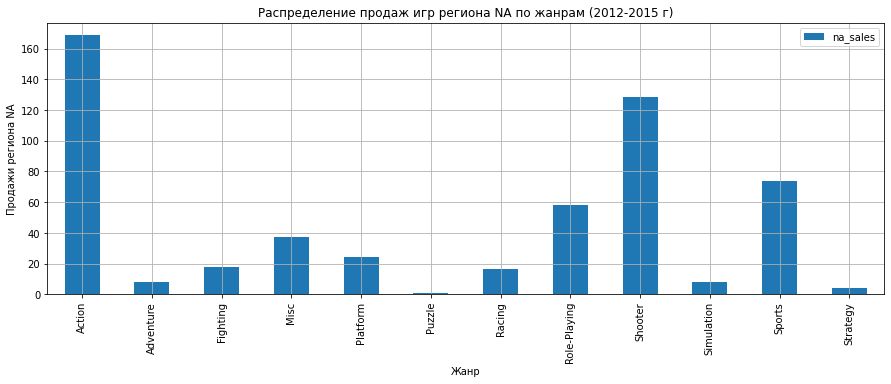

In [38]:
#Сделаем распределение продаж региона NA по жанрам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='genre', values='na_sales', aggfunc = 'sum').reset_index()\
    .plot(x='genre', y='na_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона NA по жанрам (2012-2015 г)', xlabel = 'Жанр', ylabel = 'Продажи региона NA')

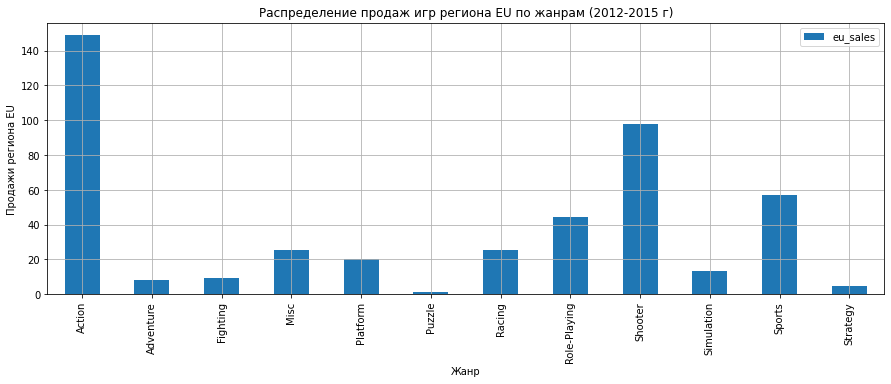

In [39]:
#Сделаем распределение продаж региона EU по жанрам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='genre', values='eu_sales', aggfunc = 'sum').reset_index()\
    .plot(x='genre', y='eu_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона EU по жанрам (2012-2015 г)', xlabel = 'Жанр', ylabel = 'Продажи региона EU')

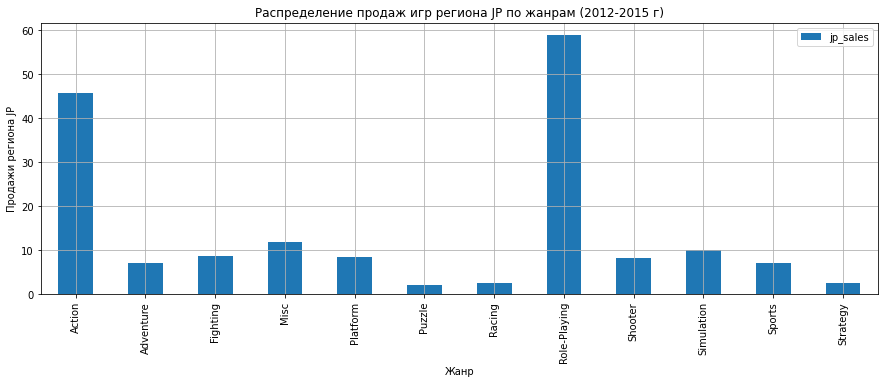

In [40]:
#Сделаем распределение продаж региона JP по жанрам для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='genre', values='jp_sales', aggfunc = 'sum').reset_index()\
    .plot(x='genre', y='jp_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона JP по жанрам (2012-2015 г)', xlabel = 'Жанр', ylabel = 'Продажи региона JP')

На графиках видно, что безусловным лидером в регионах NA и EU является жанр Action, тогда как в регионе JP лидирует жанр
Role-Playing, а Action находится на 2м месте.
Скорее всего данное различие связано с различием в предпочтениях в регионе JP по сравнению с регионами NA и EU, в которых потребители в основном схожи.

Оценим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

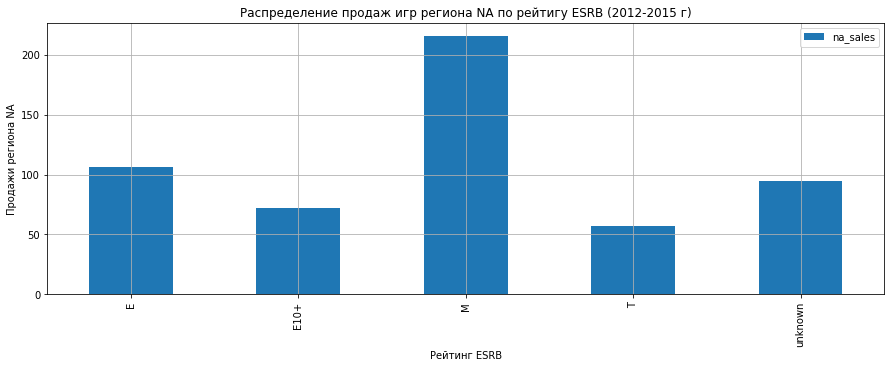

In [41]:
#Сделаем распределение продаж региона NA по рейтингу ESRB для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='na_sales', aggfunc = 'sum').reset_index()\
    .plot(x='rating', y='na_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона NA по рейтигу ESRB (2012-2015 г)', xlabel = 'Рейтинг ESRB', ylabel = 'Продажи региона NA')

In [42]:
#Посчитаем сколько % от общих продаж региона NA приходится на каждый рейтинг ESRB

data_na = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='na_sales', aggfunc = 'sum').reset_index()

data_na['share_na'] = data_na['na_sales']/data_na['na_sales'].sum()
data_na.columns = ['Рейтинг ESRB', 'Продажи региона NA', 'Доля от продаж,%']
data_na = data_na.style.format({'Доля от продаж,%': '{:,.1%}'.format,})
data_na

,Рейтинг ESRB,Продажи региона NA,"Доля от продаж,%"
0,E,106.400000,19.5%
1,E10+,71.890000,13.2%
2,M,215.900000,39.5%
3,T,57.070000,10.5%
4,unknown,94.780000,17.4%


На графике и в таблице видно, что для региона NA 82,6% продаж приходится на категорию с рейтингом.
Также, заметным является то, что игры с рейтингом M занимают 39,5%. 
Согласно этому, нельзя однозначно сказать, что рейтинг ESRB оказывает влияние на продажи в регионе.
Возможно, что в регионе NA просто больше игр с рейтингом, чем без рейтинга и в игры больше играют люди категории 18+ (рейтинг игры 18+). 

Можно сделать вывод о том, что в регионе NA самые популярные игры категории M 39,5% (для взрослых),
затем категория E 19,5% (для всех), затем примерно одинаково популярны игры категории E10+ и T (для детей старше 10 лет и тинейджеров соответственно).

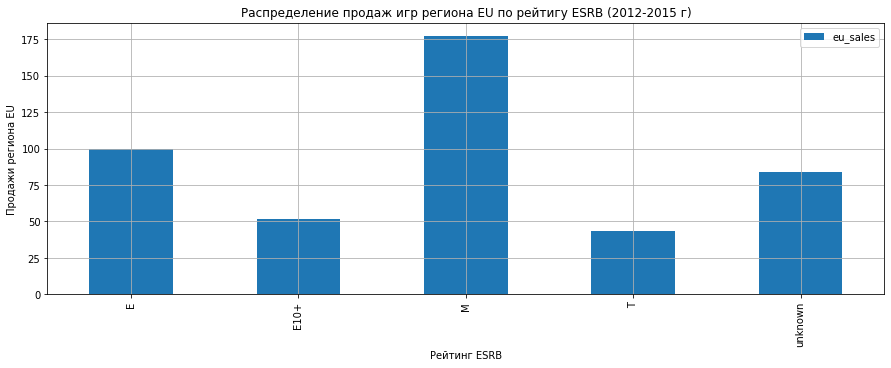

In [43]:
#Сделаем распределение продаж региона EU по рейтингу ESRB для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').reset_index()\
    .plot(x='rating', y='eu_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона EU по рейтигу ESRB (2012-2015 г)', xlabel = 'Рейтинг ESRB', ylabel = 'Продажи региона EU')

In [44]:
#Посчитаем сколько % от общих продаж региона EU приходится на каждый рейтинг ESRB

data_eu = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').reset_index()

data_eu['share_eu'] = data_eu['eu_sales']/data_eu['eu_sales'].sum()
data_eu.columns = ['Рейтинг ESRB', 'Продажи региона EU', 'Доля от продаж,%']
data_eu = data_eu.style.format({'Доля от продаж,%': '{:,.1%}'.format,})
data_eu

,Рейтинг ESRB,Продажи региона EU,"Доля от продаж,%"
0,E,99.420000,21.8%
1,E10+,51.560000,11.3%
2,M,177.420000,38.9%
3,T,43.170000,9.5%
4,unknown,84.030000,18.4%


В регионе EU ситуация очень похожа на ситуацию в регионе NA.
На графике и в таблице видно, что для региона EU 81,5% продаж приходится на категорию с рейтингом.
Также, заметным является то, что игры с рейтингом M занимают 38,9%. 
Согласно этому, нельзя однозначно сказать, что рейтинг ESRB оказывает влияние на продажи в регионе.
Возможно, что в регионе EU просто больше игр с рейтингом, чем без рейтинга и в игры больше играют люди категории 18+ (реитинг игры 18+). 


Можно сделать вывод о том, что в регионе EU самые популярные игры категории M 38,9% (для взрослых),
затем категория E 21,8% (для всех), затем примерно одинаково популярны игры категории E10+ и T (для детей старше 10 лет и тинейджеров соответственно).

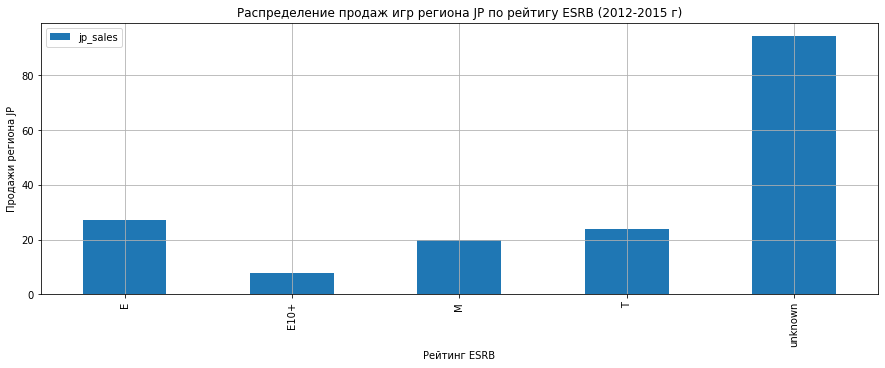

In [45]:
#Сделаем распределение продаж региона JP по рейтингу ESRB для выбранного актуального перида - 2012 - 2015

ax = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').reset_index()\
    .plot(x='rating', y='jp_sales', grid=True, figsize=(15, 5), kind='bar')\
    .set(title = 'Распределение продаж игр региона JP по рейтигу ESRB (2012-2015 г)', xlabel = 'Рейтинг ESRB', ylabel = 'Продажи региона JP')

In [46]:
#Посчитаем сколько % от общих продаж региона JP приходится на каждый рейтинг ESRB

data_jp = data.query('"2012"<= year_of_release <="2015"')\
    .pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').reset_index()

data_jp['share_jp'] = data_jp['jp_sales']/data_jp['jp_sales'].sum()
data_jp.columns = ['Рейтинг ESRB', 'Продажи региона JP', 'Доля от продаж,%']
data_jp = data_jp.style.format({'Доля от продаж,%': '{:,.1%}'.format,})
data_jp

,Рейтинг ESRB,Продажи региона JP,"Доля от продаж,%"
0,E,27.260000,15.7%
1,E10+,7.740000,4.5%
2,M,20.000000,11.5%
3,T,23.750000,13.7%
4,unknown,94.520000,54.6%


На графике и в таблице видно, что для региона JP более половины продаж приходится на категорию без рейтинга.
Это может быть связано с тем, что не все игры в регионе JP проверяются по этому рейтингу (скорее всего это игры, которые создаются в регионе).
Поэтому нельзя сказать, что рейтинг ESRB оказывает влияние на продажи в регионе, т.к. игры без рейтинга продаются хорошо.


Можно сделать вывод о том, что в регионе JP самые популярные игры категории E 39,5% (для всех),
затем категория T 13,7% (для тинейджеров), на 3м месте игры категории M 11,5% (для взрослых) и на 4м E10+ (для детей старше 10 лет). Вместе с тем, существенная доля приходится на игры без рейтинга и в этой категории разбивка вполне может отличаться.

Шаг 5. Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза.
Средние пользовательские рейтинги платформ Xbox One и PC различаются - альтернативная гипотеза.

In [47]:
from scipy import stats as st
import numpy as np

user_score_xone = data.query('platform =="XOne" and ("2012"<= year_of_release <="2015")')['user_score']
user_score_pc = data.query('platform =="PC" and ("2012"<= year_of_release <="2015")')['user_score']
alpha = 0.05

results = st.ttest_ind(
    user_score_xone, 
    user_score_pc) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.7954249001083293
Не получилось отвергнуть нулевую гипотезу


Таким образом, можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - 
нулевая гипотеза не отвергается.

Средние пользовательские рейтинги жанров Action и Sports одинаковые - нулевая гипотеза.
Средние пользовательские рейтинги жанров Action и Sports разные - альтернативная гипотеза.

In [48]:
user_score_action = data.query('genre =="Action" and ("2012"<= year_of_release <="2015")')['user_score']
user_score_sports = data.query('genre =="Sports" and ("2012"<= year_of_release <="2015")')['user_score']
alpha = 0.05

results = st.ttest_ind(
    user_score_action, 
    user_score_sports) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.301546464403053e-19
Отвергаем нулевую гипотезу


Таким образом, можно сделать вывод, что средние пользовательские рейтинги рейтинги жанров Action и Sports разные - 
нулевая гипотеза отклоняется.

Шаг 6. Общий вывод

После проведенного анализа исторических данных компьютерных игр можно сделать следующие выводы:

- Количество выпущенных игр очень различается в зависимости от года. Максимум был в 2008 и 2009 годах - потом начался спад.
На мой взгляд, необходимо выбратьпериод с которым мы будем работать. Он должен быть близок к текущему и прогнозируемому, т.к. если взять например 1987 год - в нем былипопулярны совсем другие игры и продажи были гораздо ниже.

- Выяснили, что жизненный цикл игры составляет около 10 лет (от начала до окончания продаж).

- Выбрали актуальный период, на котором будем проводить аналитику. Если посмотреть на динамику кол-ва выпущенных игр по годам видно, что начиная с 2008 года началось падение кол-ва выходящих видеоигр. Начиная с 2012 года видна стабилизация. Поэтому за актуальный период возьмем 2012 - 2015 год (2016 год учитывать не будем, т.к. скорее всего продажи по нему еще не полные).

- Судя по графику и опираясь на то, что жизненный цикл платформы составляет около 10 лет, то потенциально прибыльными можно считать платформы PS4 и xOne. Они будут продаваться еще около 7 лет. Остальные платформы из топ 5 за выбранный период демонстрируют спад продаж.
Если рассматривать не топовые платформы, можно братить внимание на платформу WiiU - она вышла в 2012 году и имеет стабильную динамику продаж, которая может сохраняться еще несколько лет. Поэтому ее я также отнесла бы к потенциально прибыльной в своем сегменте.

- Построили график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам.

Рассмотрим ящики с усами:

Для всех платформ минимальное значение это 0, т.к. продажи не могут быть отрицательными.
Верхний заканчивается около 2,5 у PS4 и XOne и около 1,2 у WiiU — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней будем считать выбросами.
Медиана у PS4 и XOne - около 0,3, а у WiiU - около 0,2.
Т.к. зеленая линия стремится вниз, а не в сторону верхнего уса, можно сделать вывод, что выбросы - это достаточно редкое явление для всех платформ.

- Проверили, зависят ли продажи платформы PS4 от отзывов пользователей.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - -0.028820146478203145
Как на графике, так и при рассчете корреляции видно, что зависимость отсутствует.

- Проверили, зависят ли продажи платформ XOne и WiiU от отзывов пользователей.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - 0.16141618154008666
Как на графике, так и при рассчете корреляции видно, что зависимость отсутствует.

- Проверили, зависят ли продажи платформы PS4 от отзывов критиков.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - После проведенного анализа исторических данных компьютерных игр можно сделать следующие выводы:

- Количество выпущенных игр очень различается в зависимости от года. Максимум был в 2008 и 2009 годах - потом начался спад.
На мой взгляд, необходимо выбратьпериод с которым мы будем работать. Он должен быть близок к текущему и прогнозируемому, т.к. если взять например 1987 год - в нем былипопулярны совсем другие игры и продажи были гораздо ниже.

- Выяснили, что жизненный цикл игры составляет около 10 лет (от начала до окончания продаж).

- Выбрали актуальный период, на котором будем проводить аналитику. Если посмотреть на динамику кол-ва выпущенных игр по годам видно, что начиная с 2008 года началось падение кол-ва выходящих видеоигр. Начиная с 2012 года видна стабилизация. Поэтому за актуальный период возьмем 2012 - 2015 год (2016 год учитывать не будем, т.к. скорее всего продажи по нему еще не полные).

- Судя по графику и опираясь на то, что жизненный цикл платформы составляет около 10 лет, то потенциально прибыльными можно считать платформы PS4 и xOne. Они будут продаваться еще около 7 лет. Остальные платформы из топ 5 за выбранный период демонстрируют спад продаж.
Если рассматривать не топовые платформы, можно братить внимание на платформу WiiU - она вышла в 2012 году и имеет стабильную динамику продаж, которая может сохраняться еще несколько лет. Поэтому ее я также отнесла бы к потенциально прибыльной в своем сегменте.

- Построили график «ящик с усами» по глобальным продажам игр в разбивке по потенциально прибыльным платформам.

Для всех платформ минимальное значение это 0, т.к. продажи не могут быть отрицательными.
Верхний заканчивается около 2,5 у PS4 и XOne и около 1,2 у WiiU — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней будем считать выбросами.
Медиана у PS4 и XOne - около 0,3, а у WiiU - около 0,2.
Т.к. зеленая линия стремится вниз, а не в сторону верхнего уса, можно сделать вывод, что выбросы - это достаточно редкое явление для всех платформ.

- Проверили, зависят ли продажи платформы PS4 от отзывов пользователей.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - -0.028820146478203145
Как на графике, так и при рассчете корреляции видно, что зависимость отсутствует.

- Проверили, зависят ли продажи платформ XOne и WiiU от отзывов пользователей.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - 0.16141618154008666
Как на графике, так и при рассчете корреляции видно, что зависимость отсутствует.

- Проверили, зависят ли продажи платформы PS4 от отзывов критиков.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - 0.4318482049982005
Как на графике, так и при рассчете корреляции видно, что зависимость есть, но не высокая.

- Проверили, зависят ли продажи платформ XOne и WiiU от отзывов критиков.

Для этого, построили диаграмму рассеяния и посчитали корреляцию.
Значение корреляции - 0.41397224738362337
Как на графике, так и при рассчете корреляции видно, что зависимость есть, но не высокая.

Таким образом, можно сделать вывод, что как для выбранной платформы PS4, так и для других прибыльных платформ обьем продаж поожительно зависит от оценок критиков и не зависит от оценок пользователей.

- Рассмотрели распределение игр по жанрам.
Были построены 2 графика - по суммарным продажам и по медиане. В итоге графики дали различные результаты - 
по суммарным продажам лидирует "Action", а по медианным "Shooter".
Это может быть связано с тем, что жанр "Action" продается больше в количественном измерении и может быть сильно раздут 
непопулярными и недорогими играми. Более стабильным будет вариант "Shooter", лидирующий по медиане.

- Составили портрет пользователей в разбивке по регионам

Топ5 самых популярных платформ для региона NA:
X360 - 25,5% PS3 - 18,8% PS4 - 16% XOne - 14,4% 3DS - 9,4%
Т.к. в качестве перспективных для инвестиций мы веделили только PS4 и XOne из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона NA можно и PS4 и XOne т.к. долю рынка они занимают примерно одинаковую.

Топ5 самых популярных платформ для региона EU:
PS4 - 24% PS3 - 23,2% X360 - 16,2% XOne - 9,2% 3DS - 8,8%
Т.к. в качестве перспективных для инвестиций мы веделили только PS4 и XOne из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона EU будем PS4, т.к. доля рынка у нее выше, чем у XOne.

Топ5 самых популярных платформ для региона JP:
3DS - 46% PS3 - 19,6% PSV - 10,1% WiiU - 7,1% PSP - 6%
Т.к. в качестве перспективных для инвестиций мы веделили только WiiU из данного списка,
то можно сделать вывод, что рекомендовать инвестору для региона JP будем WiiU, т.к. в другие вкладывать деньги нет смысла.

Проанализировав данные всех регионов, видим интересные тенденции:

Для регионов NA и EU лидеры это платформа PS (3 и 4е поколение), а также X360. Причем, в регионе NA лидирующее положение занимает платформа X360, когда как в EU - PS.

Для региона JP ситуация прямо противоположная - почти половину рынка (46%) занимает платформа 3DS. PS3 находится на 2м месте с существенным отрывом (19,6%), тогда как X360 занимает практически минимальную долю рынка (0,9%).

- Оценили популярные жанры в разбивке по регионам

На графиках видно, что безусловным лидером в регионах NA и EU является жанр Action, тогда как в регионе JP лидирует жанр Role-Playing, а Action находится на 2м месте. Скорее всего данное различие связано с различием в предпочтениях в регионе JP по сравнению с регионами NA и EU, в которых потребители в основном схожи.

- Оценили влияние рейтинга ESRB на продажи в разбивке по регионам

Для региона NA 82,6% продаж приходится на категорию с рейтингом.
Также, заметным является то, что игры с рейтингом M занимают 39,5%. 
Согласно этому, нельзя однозначно сказать, что рейтинг ESRB оказывает влияние на продажи в регионе.
Возможно, что в регионе NA просто больше игр с рейтингом, чем без рейтинга и в игры больше играют люди категории 18+ (рейтинг игры 18+).
Можно сделать вывод о том, что в регионе NA самые популярные игры категории M 39,5% (для взрослых),
затем категория E 19,5% (для всех), затем примерно одинаково популярны игры категории E10+ и T (для детей старше 10 лет и тинейджеров соответственно).

Для региона EU тенденция и разбивка практически аналогичная.
Можно сделать вывод о том, что в регионе EU самые популярные игры категории M 38,9% (для взрослых),
затем категория E 21,8% (для всех), затем примерно одинаково популярны игры категории E10+ и T (для детей старше 10 лет и тинейджеров соответственно).

Для региона JP более половины продаж приходится на категорию без рейтинга.
Это может быть связано с тем, что не все игры в регионе JP проверяются по этому рейтингу (скорее всего это игры, которые создаются в регионе).
Поэтому нельзя сказать, что рейтинг ESRB оказывает влияние на продажи в регионе, т.к. игры без рейтинга продаются хорошо.
Можно сделать вывод о том, что в регионе JP самые популярные игры категории E 39,5% (для всех),
затем категория T 13,7% (для тинейджеров), на 3м месте игры категории M 11,5% (для взрослых) и на 4м E10+ (для детей старше 10 лет). Вместе с тем, существенная доля приходится на игры без рейтинга и в этой категории разбивка вполне может отличаться.

- Проверили гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - нулевая гипотеза.
Средние пользовательские рейтинги платформ Xbox One и PC различаются - альтернативная гипотеза.

Нулевая гипотеза подтвердилась.

Средние пользовательские рейтинги жанров Action и Sports одинаковые - нулевая гипотеза.
Средние пользовательские рейтинги жанров Action и Sports разные - альтернативная гипотеза.

Нулевая гипотеза не подтвердилась.
